# Trading bot

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 25 kB/s 
     |████████████████████████████████| 198 kB 51.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=9bcb57f85b8d818eeba77352614468b772c564e05d66cef2ee1579afa11de75f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


## Data Wrangling

In [ ]:
import numpy, pandas, matplotlib, sklearn
#import pyspark
#from pyspark.sql import SparkSession
import requests

#spark = SparkSession.builder \
                    #.appName('Trading Bot') \
                    #.getOrCreate()

In [ ]:
url = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=68ZFL562SH8P1EZU'
r = requests.get(url)
raw_data = r.json()
raw_data_time_series = raw_data['Time Series (Digital Currency Daily)']

print(raw_data)

In [ ]:
type(r.json())

dict

In [ ]:
data_dict = []

for k, v in raw_data_time_series.items():
    data_dict.append({
        'datetime': k,
        'open': v['1a. open (USD)'],
        'high': v['2a. high (USD)'],
        'low': v['3a. low (USD)'],
        'close': v['4a. close (USD)'],
        'volume': v['5. volume']
    })

# 'cap': v['6. market cap (USD)']  

data_dict[0:5]

[{'close': '3141.16000000',
  'datetime': '2022-03-27',
  'high': '3149.29000000',
  'low': '3137.29000000',
  'open': '3145.01000000',
  'volume': '5991.15890000'},
 {'close': '3145.00000000',
  'datetime': '2022-03-26',
  'high': '3153.20000000',
  'low': '3084.90000000',
  'open': '3102.13000000',
  'volume': '207134.84700000'},
 {'close': '3102.14000000',
  'datetime': '2022-03-25',
  'high': '3193.28000000',
  'low': '3076.00000000',
  'open': '3110.75000000',
  'volume': '489099.55720000'},
 {'close': '3110.76000000',
  'datetime': '2022-03-24',
  'high': '3129.11000000',
  'low': '2999.11000000',
  'open': '3035.99000000',
  'volume': '577171.52390000'},
 {'close': '3036.00000000',
  'datetime': '2022-03-23',
  'high': '3045.20000000',
  'low': '2920.65000000',
  'open': '2969.64000000',
  'volume': '453962.72980000'}]

In [ ]:
# Will work in pandas temporarily due to PySpark Pickling Error
import numpy as np
import pandas as pd

df1 = pd.DataFrame(data_dict)

df1.head()

,datetime,open,high,low,close,volume
0,2022-03-27,3145.01000000,3149.29000000,3137.29000000,3141.16000000,5991.15890000
1,2022-03-26,3102.13000000,3153.20000000,3084.90000000,3145.00000000,207134.84700000
2,2022-03-25,3110.75000000,3193.28000000,3076.00000000,3102.14000000,489099.55720000
3,2022-03-24,3035.99000000,3129.11000000,2999.11000000,3110.76000000,577171.52390000
4,2022-03-23,2969.64000000,3045.20000000,2920.65000000,3036.00000000,453962.72980000


In [ ]:
df1.tail()

,datetime,open,high,low,close,volume
995,2019-07-05,282.86000000,294.89000000,280.78000000,287.47000000,261139.28341000
996,2019-07-04,301.11000000,302.74000000,280.53000000,282.73000000,270791.36878000
997,2019-07-03,291.47000000,302.89000000,285.00000000,301.14000000,370521.96637000
998,2019-07-02,295.03000000,297.57000000,272.65000000,291.48000000,493772.96579000
999,2019-07-01,292.89000000,303.49000000,280.13000000,295.07000000,489769.27421000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  1000 non-null   object
 1   open      1000 non-null   object
 2   high      1000 non-null   object
 3   low       1000 non-null   object
 4   close     1000 non-null   object
 5   volume    1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [ ]:
df1.shape

(1000, 6)

In [ ]:
df1 = df1.astype({"open": float, "high": float, "low": float, "close": float, "volume": float})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  1000 non-null   object 
 1   open      1000 non-null   float64
 2   high      1000 non-null   float64
 3   low       1000 non-null   float64
 4   close     1000 non-null   float64
 5   volume    1000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# df1['open'] = df1['open'].pct_change() # Create arithmetic returns column
# df1['high'] = df1['high'].pct_change() # Create arithmetic returns column
# df1['low'] = df1['low'].pct_change() # Create arithmetic returns column
# df1['close'] = df1['close'].pct_change() # Create arithmetic returns column
# df1['volume'] = df1['volume'].pct_change()

# df1.dropna(how='any', axis=0, inplace=True)
# df1.head()

scaler = MinMaxScaler(feature_range=(0, 1))
df2 = df1[["open", "high", "low", "close", "volume"]]
df3 = df1["datetime"]
df1s = pd.concat([ 
    df3,
    pd.DataFrame(
        scaler.fit_transform(df2), # np.array(df2).reshape(-1, 1)
        columns = ["open", "high", "low", "close", "volume"]
    )
], axis = 1)

df1s = df1s[df1s["close"] != 0.0]
df1s = df1s[df1s["volume"] != 0.0]
df1s

,datetime,open,high,low,close,volume
1,2022-03-26,0.637077,0.638951,0.648006,0.646187,0.043189
2,2022-03-25,0.638911,0.647390,0.646083,0.637068,0.103733
3,2022-03-24,0.623006,0.633879,0.629468,0.638902,0.122643
4,2022-03-23,0.608890,0.616212,0.612515,0.622996,0.096188
5,2022-03-22,0.591952,0.617823,0.605120,0.608877,0.120002
...,...,...,...,...,...,...
995,2019-07-06,0.038221,0.037522,0.043061,0.038397,0.040812
996,2019-07-05,0.037272,0.037139,0.042088,0.038222,0.054785
997,2019-07-04,0.041155,0.038791,0.042034,0.037214,0.056858
998,2019-07-03,0.039104,0.038823,0.043000,0.041131,0.078272


In [ ]:
# Test Train Split
times = sorted(df1s.index.values)
fifteen_pct = sorted(df1s.index.values)[-int(0.15*len(times))]
thirty_pct = sorted(df1s.index.values)[-int(0.30*len(times))]

df_train = df1s[(df1s.index < thirty_pct)]
df_val = df1s[(df1s.index >= thirty_pct) & (df1s.index < fifteen_pct)]
df_test = df1s[(df1s.index >= fifteen_pct)]

df_val = df_val.reset_index()
df_test = df_test.reset_index()
df_train = df_train.reset_index()

df_train = df_train[["datetime","open", "high", "low", "close", "volume"]]
df_val = df_val[["datetime","open", "high", "low", "close", "volume"]]
df_test = df_test[["datetime","open", "high", "low", "close", "volume"]]

array_test = np.array(df_test)
df_val.head()

,datetime,open,high,low,close,volume
0,2020-04-26,0.018412,0.017160,0.022969,0.019055,0.161584
1,2020-04-25,0.017005,0.016814,0.021556,0.018380,0.184763
2,2020-04-24,0.016573,0.015012,0.021332,0.016972,0.166389
3,2020-04-23,0.015963,0.015819,0.019914,0.016529,0.311745
4,2020-04-22,0.013416,0.013791,0.018103,0.015931,0.211006


In [ ]:
def create_dataset(dataset, time_step, offset=0):
    x_train, y_train = [], []
    for i in range(time_step, len(dataset)-1):
        x_train.append(dataset[i-time_step:i])
        y_train.append(dataset['close'][i + offset+1])
    return np.array(x_train), np.array(y_train)

In [ ]:
time_step = 25
X_train, y_train = create_dataset(df_train[["open", "high", "low", "close", "volume"]], time_step)
X_val, y_val = create_dataset(df_val[["open", "high", "low", "close", "volume"]], time_step)
X_test, y_test = create_dataset(df_test[["open", "high", "low", "close", "volume"]], time_step)
# X_train, y_train = create_dataset(df_train[["close"]], time_step)
# X_val, y_val = create_dataset(df_val[["close"]], time_step)
# X_test, y_test = create_dataset(df_test[["close"]], time_step)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(673, 25, 5)
(673,)
(124, 25, 5)
(124,)
(123, 25, 5)
(123,)


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)
#X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
# Model Building
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Embedding, Dense
from keras import Model, Input

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(50,5)),
    LSTM(50, return_sequences=True),
    LSTM(25),
    Dense(50, activation="relu"),
    Dense(1, activation='sigmoid')
])

# Dense(50, activation="relu")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            11200     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 25)                7600      
                                                                 
 dense_2 (Dense)             (None, 50)                1300      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 40,351
Trainable params: 40,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mse',
    metrics = ['mae', 'mape']
)

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 50, 5) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
lstm (None, 50, 5) float32
lstm_1 (None, 50, 50) float32
lstm_2 (None, 50, 50) float32
dense (None, 25) float32
dense_1 (None, 50) float32


[None, None, None, None, None]

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint('LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

# np.asarray(df_train["close"]).astype(np.float32)

model.fit(
    X_train,
    y_train,
    epochs = 30,
    batch_size = 100,
    verbose = 2,
    callbacks = [callback],
    validation_data=(
        X_val, 
        y_val
    )
)

Epoch 1/30

Epoch 1: val_loss improved from inf to 0.19681, saving model to LSTM.hdf5
7/7 - 18s - loss: 0.0967 - mae: 0.2703 - mape: 441.6591 - val_loss: 0.1968 - val_mae: 0.4433 - val_mape: 4877.2920 - 18s/epoch - 3s/step
Epoch 2/30

Epoch 2: val_loss improved from 0.19681 to 0.06735, saving model to LSTM.hdf5
7/7 - 2s - loss: 0.0584 - mae: 0.2034 - mape: 353.1826 - val_loss: 0.0674 - val_mae: 0.2571 - val_mape: 2969.1033 - 2s/epoch - 235ms/step
Epoch 3/30

Epoch 3: val_loss improved from 0.06735 to 0.00963, saving model to LSTM.hdf5
7/7 - 1s - loss: 0.0202 - mae: 0.1179 - mape: 143.8730 - val_loss: 0.0096 - val_mae: 0.0969 - val_mape: 1132.9506 - 1s/epoch - 204ms/step
Epoch 4/30

Epoch 4: val_loss improved from 0.00963 to 0.00784, saving model to LSTM.hdf5
7/7 - 1s - loss: 0.0117 - mae: 0.0843 - mape: 77.0779 - val_loss: 0.0078 - val_mae: 0.0873 - val_mape: 1023.1519 - 1s/epoch - 189ms/step
Epoch 5/30

Epoch 5: val_loss improved from 0.00784 to 0.00116, saving model to LSTM.hdf5
7/7 

In [ ]:
from keras.layers import *

in_seq = Input(shape = (time_step, 5))
    
x = Bidirectional(LSTM(50, return_sequences=True))(in_seq)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = Bidirectional(LSTM(25, return_sequences=True))(x) 
        
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
conc = Dense(25, activation="relu")(conc)
out = Dense(1, activation="linear")(conc)      

model2 = Model(inputs=in_seq, outputs=out)
model2.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])  

In [ ]:
callback2 = tf.keras.callbacks.ModelCheckpoint('BiLSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

model2.fit(
    X_train,
    y_train,
    epochs = 40,
    batch_size = 100,
    verbose = 2,
    callbacks = [callback2],
    validation_data=(
        X_val, 
        y_val
    )
)

Epoch 1/40

Epoch 1: val_loss improved from inf to 0.00379, saving model to BiLSTM.hdf5
7/7 - 14s - loss: 0.0503 - mae: 0.1611 - mape: 86.6904 - val_loss: 0.0038 - val_mae: 0.0611 - val_mape: 845.6424 - 14s/epoch - 2s/step
Epoch 2/40

Epoch 2: val_loss improved from 0.00379 to 0.00014, saving model to BiLSTM.hdf5
7/7 - 1s - loss: 0.0131 - mae: 0.0799 - mape: 34.1340 - val_loss: 1.3616e-04 - val_mae: 0.0108 - val_mape: 178.1344 - 824ms/epoch - 118ms/step
Epoch 3/40

Epoch 3: val_loss did not improve from 0.00014
7/7 - 1s - loss: 0.0068 - mae: 0.0563 - mape: 17.3067 - val_loss: 1.5794e-04 - val_mae: 0.0080 - val_mape: 53.4644 - 781ms/epoch - 112ms/step
Epoch 4/40

Epoch 4: val_loss did not improve from 0.00014
7/7 - 1s - loss: 0.0058 - mae: 0.0557 - mape: 25.4724 - val_loss: 1.5742e-04 - val_mae: 0.0079 - val_mape: 52.8974 - 791ms/epoch - 113ms/step
Epoch 5/40

Epoch 5: val_loss did not improve from 0.00014
7/7 - 1s - loss: 0.0053 - mae: 0.0513 - mape: 18.3608 - val_loss: 1.8345e-04 - va

In [ ]:
from sklearn import preprocessing

print("Generate a prediction")
prediction = model2.predict(X_test)
print("prediction shape:", prediction.shape)
print(prediction)
print(y_test)



print(scaler.inverse_transform(df_test[["open", "high", "low", "close", "volume"]]))

Generate a prediction
prediction shape: (123, 1)
[[0.01428614]
 [0.01446768]
 [0.01434812]
 [0.01475123]
 [0.01477662]
 [0.01498744]
 [0.01627126]
 [0.01674475]
 [0.01691305]
 [0.01703398]
 [0.01692859]
 [0.01665116]
 [0.01621488]
 [0.01632   ]
 [0.01616661]
 [0.01585963]
 [0.01557341]
 [0.01526533]
 [0.0150185 ]
 [0.01478726]
 [0.014865  ]
 [0.01482485]
 [0.01476919]
 [0.01460172]
 [0.01429036]
 [0.01366929]
 [0.01301132]
 [0.01251025]
 [0.01224214]
 [0.01216728]
 [0.01212315]
 [0.01222896]
 [0.01263246]
 [0.01373511]
 [0.01442011]
 [0.01455367]
 [0.01512722]
 [0.01491077]
 [0.01467837]
 [0.01450532]
 [0.01452419]
 [0.01483362]
 [0.01526846]
 [0.0158044 ]
 [0.01628009]
 [0.01641594]
 [0.01673321]
 [0.01702126]
 [0.01755832]
 [0.01769923]
 [0.01788467]
 [0.01787   ]
 [0.01787866]
 [0.01766932]
 [0.01734695]
 [0.01692709]
 [0.0165441 ]
 [0.01597158]
 [0.01518368]
 [0.01431762]
 [0.01338629]
 [0.01265351]
 [0.01208287]
 [0.01180559]
 [0.01181869]
 [0.01248232]
 [0.01198755]
 [0.01181331]

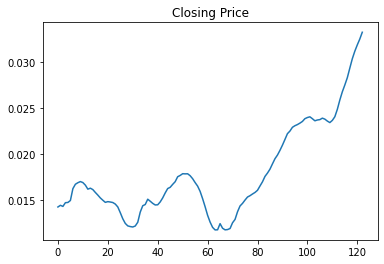

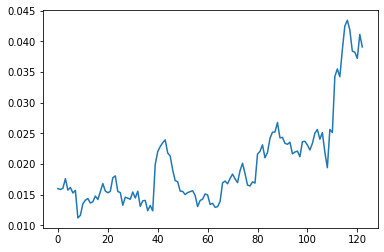

In [ ]:
import matplotlib.pyplot as plt

plt.plot(prediction)

plt.title("Closing Price")
plt.show()

plt.plot(y_test)
plt.show()



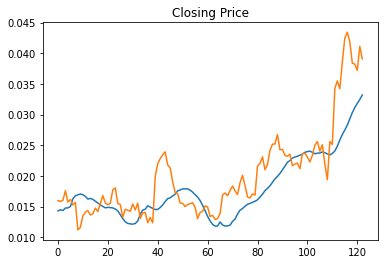

In [ ]:
plt.title("Closing Price")
plt.plot(prediction)
plt.plot(y_test)
plt.show()

PySpark Stuff

In [ ]:
'''
from pyspark.sql.types import StringType
df = spark.createDataFrame(raw_data_time_series, StringType())'''
from pyspark.sql.types import StructField, StructType, StringType, DateType, DoubleType

schema = StructType([ \
    StructField("cap", StringType(), True), \
    StructField("close", StringType(), True), \
    StructField("datetime", StringType(), True), \
    StructField("high", StringType(), True), \
    StructField("low", StringType(), True), \
    StructField("open", StringType(), True), \
    StructField("volume", StringType(), True) \
  ])

df = spark.createDataFrame(data_dict, schema=schema)

df.show(5)

NameError: ignored

In [ ]:
df.printSchema()

In [ ]:
df.describe().show()

In [ ]:
from pyspark.sql.functions import col, lit, lag
from pyspark.sql.window import Window
from datetime import datetime
from pyspark.sql.types import StringType, BooleanType, DateType

df = df.withColumn('cap', col('cap').cast('Double')) \
       .withColumn('open', col('open').cast('Double')) \
       .withColumn('close', col('close').cast('Double')) \
       .withColumn('high', col('high').cast('Double')) \
       .withColumn('low', col('low').cast('Double')) \
       .withColumn('volume', col('volume').cast('Double')) \
       .withColumn("datetime", col("datetime").cast(DateType()))
       
win = Window.orderBy('datetime')
df = df.withColumn('percent_change_close', (df['close'] - lag(df['close']).over(win))/100)

df.printSchema()
df.show()

In [ ]:
df.filter("datetime is NULL").show()

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

'''
assembler = VectorAssembler(inputCols=["open", "high", "low", "close", "volume", "cap"], outputCol="vector")
scaler = MinMaxScaler(outputCol="scaled")
scaler.setInputCol("vector")
pipeline = Pipeline(stages=[assembler, scaler])
scaler_model = pipeline.fit(df)
scaled_df = scaler_model.transform(df)
scaled_df.show(5)'''

columns_to_scale = ["open", "high", "low", "close", "volume", "cap", "percent_change_close"]
assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec").setHandleInvalid("skip") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
pipeline = Pipeline(stages=assemblers + scalers)
scaler_model = pipeline.fit(df)
scaled_df = scaler_model.transform(df)
scaled_df.show(5)

In [ ]:
scaled_df1 = scaled_df.select(["datetime", "open_scaled", "high_scaled", "low_scaled", "close_scaled", "volume_scaled", "cap_scaled", "percent_change_close_scaled"])
scaled_df1.show(5)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

#Do we need the data scaled in a vector or just scalar for the model?
unlist = udf(lambda x: float(list(x)[0]), DoubleType())

scaled_columns = ["open_scaled", "high_scaled", "low_scaled", "close_scaled", "volume_scaled", "cap_scaled", "percent_change_close_scaled"]

scaled_df2 = scaled_df1

for col_name in scaled_columns:
    scaled_df2 = scaled_df2.withColumn(col_name, unlist(col_name))

scaled_df2.show(5)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pyspark

pandasDF = scaled_df2.toPandas()
plt.plot(pandasDF["datetime"], pandasDF["close_scaled"])
plt.title("Closing Price")
plt.show()

plt.plot(pandasDF["datetime"], pandasDF["percent_change_close_scaled"])
plt.title("Percent Change over time")
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Embedding, Dense
from keras import Model, Input

def create_model():
    '''
    inputs = Input(scaled_df2.shape())

    x = Embedding(max_features, 128)(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(64))(x)

    out = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inputs, outputs=out)
    model.summary()'''
    pass

create_model()
    